"Joshi" at any point of code or comments refers to **Pratik Joshi, Sebastin Santy, Amar Budhiraja, Kalika Bali, and Monojit Choudhury. 2020. The state and fate of linguistic diversity and inclusion in the NLP world. In Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics, pages 6282–6293, Online. Association for Computational Linguistics.**

# Mount the Google drive 

In [56]:
from google.colab import drive

try:
  drive.mount('/content/gdrive')
  pathBase="/content/gdrive/MyDrive/Research/AACL Sinhala Paper/"  
except:
  print("Load the drive manually from the left panel first. Then run this again,")
  pathBase="/content/drive/MyDrive/Research/AACL Sinhala Paper/"  

pathFull=pathBase+"Final Official Github Repo/"
dataPath=pathFull+"Data/"
inputPath=dataPath+"Input/"
outputPath=dataPath+"Output/"
intermediatePath=outputPath+"Intermediate/"

pathI=outputPath+"images/"
pathT=outputPath+"tables/"
pathJ=outputPath+"json/"
pathC=outputPath+"outCSVs/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Define the colour schemes

In [2]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colourNames=["#FFCCCC","#FF8888","#FF4444","#FF0000","#CCFFCC","#88FF88","#44FF44","#00FF00","#CCCCFF","#8888FF","#4444FF","#0000FF"]
jcolourNames=["green","blue","purple","yellow","orange","red"]
geoClourNames=colourNames+colourNames

newcmp = ListedColormap(colourNames)
jcmp = ListedColormap(jcolourNames)
gcmp=ListedColormap(geoClourNames)

# Define Ethnolog Axis sorting order for visualizations

In [14]:
sizeArr=['Small','Mid','Large']
vitalityArr=['Extinct','Endangered','Stable','Institutional']

# Load the inputs

## Main CSV

In [3]:
import pandas as pd

data=pd.read_csv(inputPath+"language data - ethnologue languages.csv", thousands=',') 

In [4]:
data.columns # Verify the data columns

Index(['Name', 'ethnolog_Size', 'ethnolog_Vitality', 'L1 speakers',
       'L2 speakers', 'New wiki', 'Size of Wikipedia (Articles Column)',
       'language family', 'geographical location', 'geo location analysis',
       'LDC', 'Is in Google', 'wiki pages', 'natural language processing',
       'part of speech', 'grammar parsing| grammar parser',
       'question answering', 'text classification', 'universal dependencies',
       'ACL count', 'Is in XLMR', 'ELRA', 'Hugginface', 'kaggle', 'CC Size',
       'Is in Facebook', 'Joshi Classes', 'mBERT', 'HF new'],
      dtype='object')

In [5]:
# Drop the sections that we are not going to use in visualizations 

data=data.drop(index=[0,1])
data=data.drop(['kaggle',  'natural language processing', 'part of speech',
       'grammar parsing| grammar parser', 'question answering',
       'text classification'], axis=1)

In [6]:
# Some of our ethnolog class annotations had to be fixed

def capitalizeColumn(c):
  data[c]= [s.title() if type(s)==str else s for s in data[c].tolist()]


capitalizeColumn("ethnolog_Size")
capitalizeColumn("ethnolog_Vitality")

In [7]:
# Fill the sparsley filled XLMR and mBERT columns. 

XLMRandBERT=['Is in XLMR','mBERT']

for c in XLMRandBERT:
  data[c]=pd.to_numeric(data[c],errors='coerce')
  data[c]=data[c].fillna(0)

# Since we are considering them together, create a new column with the sum  

data["XLMR+mBERT"]= data[XLMRandBERT].sum(axis=1) #Rows sum 

In [9]:
# Eliminate cases where the Ethnolog data cannot be found. 
# Note: No need to do it agoing for ethnolog_Vitality because the availablity of data goes hand in hand

data=data.dropna(subset=['ethnolog_Size'])

In [10]:
# Our annotators had put spaces in the Google column. It was easier to fix it in code rather than going and editing the source again

data['Is in Google']=data['Is in Google'].fillna(0)
data['Is in Google']=pd.to_numeric(data['Is in Google'],errors='coerce')
data['Is in Google']=data['Is in Google'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [11]:
# Clean up the Joshi class column by assigning -1 to languages where Joshi has not assigned a class

data['Joshi Classes']=data['Joshi Classes'].fillna(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Create intermediary data structures

In [12]:
def makeD():
  d={}
  for s in list(set(data.ethnolog_Size)):
    d[s]={}
    for v in list(set(data.ethnolog_Vitality)):
      d[s][v]=data[(data.ethnolog_Size==s) & (data.ethnolog_Vitality	==v)]
  return(d)

d=makeD()

In [15]:
# Calculate the max while printing basic counts for reference

m=0

for s in d:
  for v in d[s]:
    num=len(d[s][v])
    m=max(m,num)
    print(s+" "+v+": "+str(num))

Mid Endangered: 458
Mid Extinct: 0
Mid Stable: 1700
Mid Institutional: 208
Large Endangered: 14
Large Extinct: 0
Large Stable: 133
Large Institutional: 217
Small Endangered: 2162
Small Extinct: 332
Small Stable: 1168
Small Institutional: 28


In [16]:
# Added this at the very end because Arxiv didn't like spaces or paranthises

def makeFileNameArxivSafe(s):
  return(s.replace(" ","_").replace("(","_").replace(")","_"))

# Draw Bubble Graphs

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

x=[]
y=[]
area=[]
colors =[]
eColors=[]
labels=[]
vitalityArrRev=[v for v in vitalityArr]
vitalityArrRev.reverse()

def addPoint(s,v,a,c,ec):
  x.append(v)
  y.append(s)
  area.append(a) 
  colors.append(c)
  eColors.append(ec)

def addseries(series):
  for s in d:
    yAx=sizeArr.index(s)
    for v in d[s]:
      xAx=vitalityArrRev.index(v)
      cut=d[s][v]
      if(series is None):   
        addPoint(yAx,xAx,(3500*len(cut))/m,'white','blue') 
      else:
        cut=cut.dropna(subset=[series])  #Drop NaN
        cut = cut[cut[series] != 0]  #Drop zero 
        per=len(cut)/m
        addPoint(yAx,xAx,3500*per,'red','red')


def plotBubbleGraph(series):
  plt.figure(figsize=(4, 3), dpi=100)
  global x,y,area,colors,eColors,labels 
  x=[]
  y=[]
  area=[]
  colors =[]
  eColors=[]
  labels=[]

  fileName="bubbleplot"
  addseries(None)  # First draw the language bubbles in blue
  if series!=None:
    addseries(series) # Now draw the coloumn data in red
    fileName=fileName+"_"+series
  
  plt.xticks(range(len(vitalityArrRev)),vitalityArrRev)
  plt.yticks(range(len(sizeArr)), sizeArr)

  plt.scatter(x, y, s=area, c=colors, alpha=0.5,edgecolors=eColors)
  plt.margins(x=0.1,y=0.3)

  plt.savefig(pathI+makeFileNameArxivSafe(fileName)+'.png',bbox_inches='tight', dpi=500)

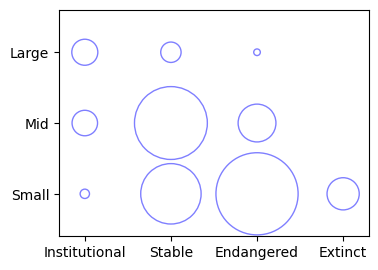

In [29]:
# Draw the empty bubble baseline

plotBubbleGraph(None)

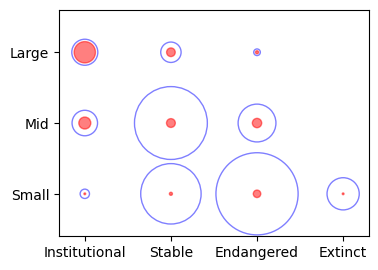

In [30]:
plotBubbleGraph('Size of Wikipedia (Articles Column)')

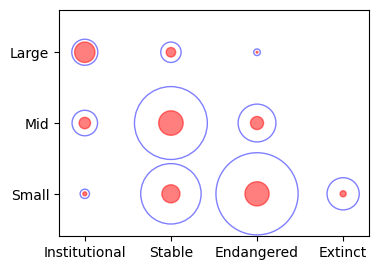

In [31]:
plotBubbleGraph('ACL count')

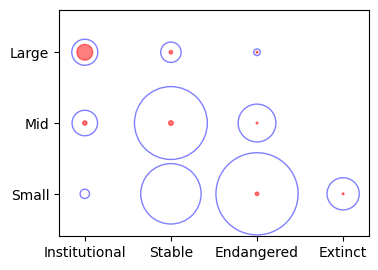

In [32]:
plotBubbleGraph('LDC')

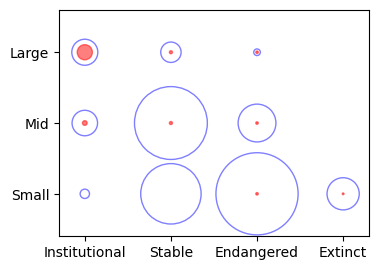

In [33]:
plotBubbleGraph('ELRA')

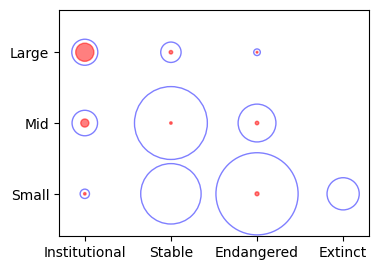

In [34]:
plotBubbleGraph('CC Size')

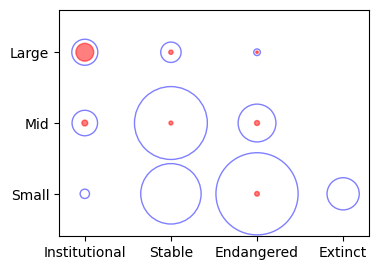

In [35]:
plotBubbleGraph('Is in Facebook') 

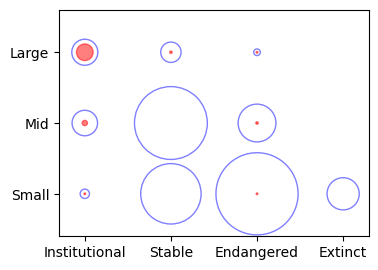

In [36]:
plotBubbleGraph('Is in Google')  

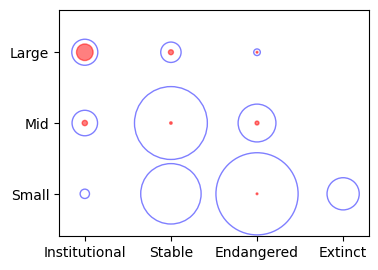

In [37]:
plotBubbleGraph('XLMR+mBERT')

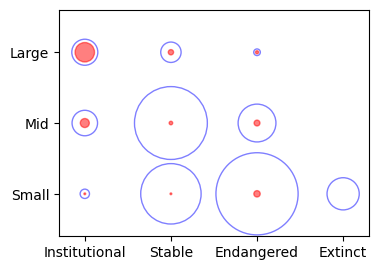

In [38]:
plotBubbleGraph('Hugginface') 

# Draw Boxplots

In [67]:
import math
import json


def drawBoxPlot(c,multi):
  plt.figure(figsize=(4, 3), dpi=100)
  boxed={}
  for s in d:
    boxed[s]={}
    for v in d[s]:
      boxed[s][v]=d[s][v][["Name",c]].dropna() # Drop Nan   
      boxed[s][v]=boxed[s][v][boxed[s][v][c] != 0]  #Drop zero  
      boxed[s][v][c]=[multi*float(b.replace(",","").replace("-","0")) if type(b)==str else b for b in boxed[s][v][c].tolist()]
      boxed[s][v][c]=[math.log(b,10) if b>0 else 0 for b in  boxed[s][v][c]]
  
  boxFlat={}
  for s in sizeArr:
    for v in vitalityArr:
      boxFlat[s+"-"+v]=boxed[s][v][c]
  
  fig1, ax1 = plt.subplots()
  boxPlotVals=ax1.boxplot(boxFlat.values())

  outliers={}
  plotIndex=0
  for s in sizeArr:
    outliers[s]={}
    for v in vitalityArr:
      outliers[s][v]=list(set(boxPlotVals["fliers"][plotIndex].get_data()[1]))
      outliers[s][v]=boxed[s][v].loc[boxed[s][v][c].isin(outliers[s][v])].to_dict(orient='index')
      plotIndex=plotIndex+1      
      

  print(outliers)


  tickerIndex=range(len(boxFlat))
  tickerIndex=[i+1 for i in tickerIndex]

  plt.ylabel('Log Value')
  plt.xticks(tickerIndex,boxFlat.keys(), rotation='vertical')

  boxplotFileName=makeFileNameArxivSafe("boxplot_"+c)
  plt.savefig(pathI+boxplotFileName+'.png',bbox_inches='tight', dpi=500)
  with open(pathJ+boxplotFileName+'_Outliers.json', 'w') as f:
    json.dump(outliers, f)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'Small': {'Extinct': {}, 'Endangered': {1091: {'Name': 'Choctaw', 'Size of Wikipedia (Articles Column)': 0.7781512503836435}, 3087: {'Name': 'Latin', 'Size of Wikipedia (Articles Column)': 5.133957034798473}, 3920: {'Name': 'Muskogee', 'Size of Wikipedia (Articles Column)': 0.0}}, 'Stable': {}, 'Institutional': {}}, 'Mid': {'Extinct': {}, 'Endangered': {}, 'Stable': {3843: {'Name': 'Motu', 'Size of Wikipedia (Articles Column)': 0.47712125471966244}}, 'Institutional': {1935: {'Name': 'Herero', 'Size of Wikipedia (Articles Column)': 0.0}, 3536: {'Name': 'Marshallese', 'Size of Wikipedia (Articles Column)': 0.6020599913279623}, 4071: {'Name': 'Ndonga', 'Size of Wikipedia (Articles Column)': 0.9030899869919434}}}, 'Large': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {58: {'Name': 'Afar', 'Size of Wikipedia (Articles Column)': 0.0}, 2418: {'Name': 'Kanuri', 'Size of Wikipedia (Articles Column)': 0.0}, 4294: {'Name': 'Nuosu', 'Size of Wikipedia (Articles Column)': 0.477

<Figure size 400x300 with 0 Axes>

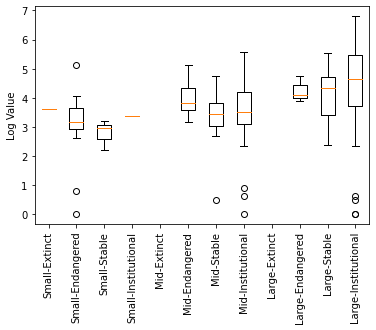

In [68]:
wikiMulti=1
drawBoxPlot('Size of Wikipedia (Articles Column)',wikiMulti)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'Small': {'Extinct': {}, 'Endangered': {4706: {'Name': 'Prussian', 'LDC': 1.3424226808222062}}, 'Stable': {}, 'Institutional': {}}, 'Mid': {'Extinct': {}, 'Endangered': {}, 'Stable': {6294: {'Name': 'Yemba', 'LDC': 0.30102999566398114}}, 'Institutional': {}}, 'Large': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {1076: {'Name': 'Chinese', 'LDC': 2.326335860928751}, 1486: {'Name': 'English', 'LDC': 2.7242758696007887}}}}


<Figure size 400x300 with 0 Axes>

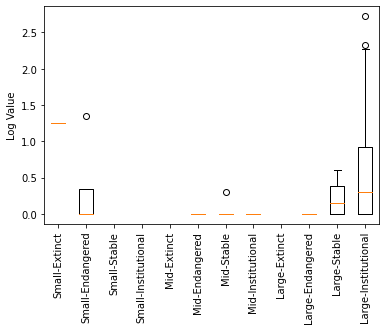

In [69]:
LDCmulti=1
drawBoxPlot('LDC',LDCmulti)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'Small': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {}}, 'Mid': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {598: {'Name': 'Basque', 'ELRA': 1.4313637641589871}}}, 'Large': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {1486: {'Name': 'English', 'ELRA': 2.9827233876685453}}}}


<Figure size 400x300 with 0 Axes>

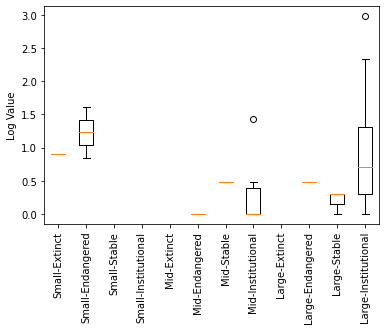

In [70]:
ELRAmulti=1
drawBoxPlot('ELRA',ELRAmulti)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'Small': {'Extinct': {5067: {'Name': 'Sensi', 'ACL count': 2.1789769472931693}}, 'Endangered': {1422: {'Name': 'E', 'ACL count': 4.4850680742908695}}, 'Stable': {}, 'Institutional': {5854: {'Name': 'Una', 'ACL count': 1.7403626894942439}}}, 'Mid': {'Extinct': {}, 'Endangered': {4565: {'Name': 'Parsi', 'ACL count': 3.402777069610347}, 5723: {'Name': 'Tu', 'ACL count': 2.9334872878487053}, 5802: {'Name': 'U', 'ACL count': 4.162385155857241}}, 'Stable': {153: {'Name': 'Ali', 'ACL count': 3.0523090996473234}, 212: {'Name': 'Anal', 'ACL count': 3.5351674851149437}, 367: {'Name': 'Au', 'ACL count': 3.680154141734373}, 1132: {'Name': 'Col', 'ACL count': 2.9881128402683514}, 1343: {'Name': 'Dom', 'ACL count': 3.2011238972073794}, 1592: {'Name': 'Fur', 'ACL count': 3.077367905284156}, 3294: {'Name': 'Ma', 'ACL count': 3.941908774365599}, 4477: {'Name': 'Pa', 'ACL count': 3.8960850854232842}, 4674: {'Name': 'Pol', 'ACL count': 2.946943270697825}}, 'Institutional': {1691: {'Name': 'Gen', 'ACL co

<Figure size 400x300 with 0 Axes>

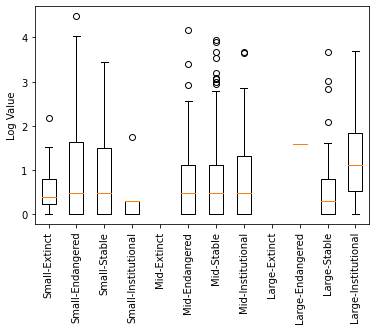

In [71]:
ACLmulti=1
drawBoxPlot('ACL count',ACLmulti)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'Small': {'Extinct': {}, 'Endangered': {3087: {'Name': 'Latin', 'CC Size': 3.039414119176137}}, 'Stable': {}, 'Institutional': {}}, 'Mid': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {316: {'Name': 'Aromanian', 'CC Size': 3.7868933252613153}}}, 'Large': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {}}}


<Figure size 400x300 with 0 Axes>

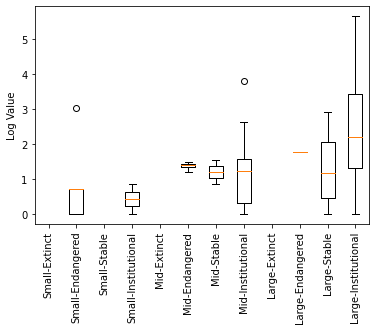

In [72]:
CCmulti=10000
drawBoxPlot('CC Size',CCmulti)       

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'Small': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {}}, 'Mid': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {}}, 'Large': {'Extinct': {}, 'Endangered': {}, 'Stable': {}, 'Institutional': {}}}


<Figure size 400x300 with 0 Axes>

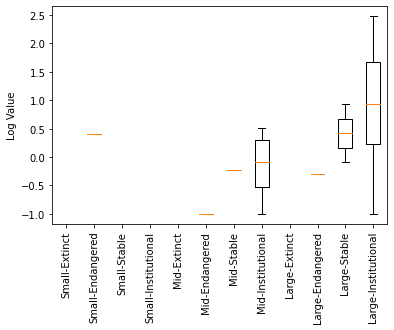

In [73]:
# Note that this is only for XLMR not the combiled column XLMR+mBert

XLMRmulti=10
drawBoxPlot('Is in XLMR',XLMRmulti) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'Small': {'Extinct': {}, 'Endangered': {4706: {'Name': 'Prussian', 'Hugginface': 1.8061799739838869}}, 'Stable': {}, 'Institutional': {}}, 'Mid': {'Extinct': {}, 'Endangered': {2482: {'Name': 'Kashubian', 'Hugginface': 0.0}, 4377: {'Name': 'Ojibwa', 'Hugginface': 0.0}}, 'Stable': {}, 'Institutional': {}}, 'Large': {'Extinct': {}, 'Endangered': {}, 'Stable': {421: {'Name': 'Aymara', 'Hugginface': 0.6020599913279623}}, 'Institutional': {391: {'Name': 'Awadhi', 'Hugginface': 0.0}, 1486: {'Name': 'English', 'Hugginface': 2.8457180179666586}, 1942: {'Name': 'Hiligaynon', 'Hugginface': 0.0}, 2418: {'Name': 'Kanuri', 'Hugginface': 0.0}, 6403: {'Name': 'Zhuang', 'Hugginface': 0.0}}}}


<Figure size 400x300 with 0 Axes>

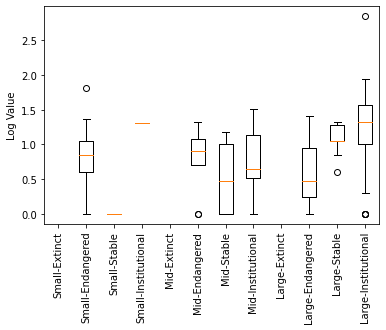

In [74]:
HugginfaceMulti=1
drawBoxPlot('Hugginface',HugginfaceMulti) 

# Create the Language List to publish (Note: Add a text version later)

In [49]:
latexString="\\tiny\n"
langNames={}
for s in d:
  langNames[s]={}
  for v in d[s]:
    langNames[s][v]=d[s][v][["Name"]].values.tolist()
    langNames[s][v]= [x for xs in langNames[s][v] for x in xs]
    if(len(langNames[s][v])>0):
      latexString=latexString+"\\underline{\\textbf{"+s+" - "+v+"}}\n"
      latexString=latexString+"\\begin{multicols}{6}\n" #${\\fontsize{2.5}{4}\\selectfont"
      for l in langNames[s][v]:
        #latexString=latexString+"\\item "+l+"\n"
        latexString=latexString+l+"\\\\\n"
      #latexString=latexString+"\\end{enumerate}\n"
      latexString=latexString+"\n\\end{multicols}"

latexString

'\\tiny\n\\underline{\\textbf{Mid - Endangered}}\n\\begin{multicols}{6}\nAche\\\\\nAchi\\\\\nAché\\\\\nAinu\\\\\nAkwa\\\\\nAlagwa\\\\\nAlangan\\\\\nAlekano\\\\\nAlune\\\\\nAluo\\\\\nAmba\\\\\nAmbae\\\\\nAmbai\\\\\nAmis\\\\\nAmri Karbi\\\\\nAndaandi\\\\\nAndh\\\\\nApache\\\\\nApatani\\\\\nAragonese\\\\\nArgobba\\\\\nArpitan\\\\\nAshtiani\\\\\nAssyrian Neo-Aramaic\\\\\nAsturian\\\\\nAtayal\\\\\nAtong\\\\\nAwa\\\\\nAwa-Cuaiquer\\\\\nAwu\\\\\nAxi\\\\\nBade\\\\\nBagobo-Klata\\\\\nBaima\\\\\nBainouk-Gunyaamolo\\\\\nBajau\\\\\nBajelani\\\\\nBakaka\\\\\nBalkan Gagauz Turkish\\\\\nBandial\\\\\nBanggai\\\\\nBankon\\\\\nBantawa\\\\\nBarwe\\\\\nBasap\\\\\nBatak Angkola\\\\\nBatak Karo\\\\\nBatanga\\\\\nBazigar\\\\\nBebele\\\\\nBenabena\\\\\nBentong\\\\\nBhele\\\\\nBiak\\\\\nBiao Mon\\\\\nBille\\\\\nBimoba\\\\\nBira\\\\\nBokha\\\\\nBola\\\\\nBolinao\\\\\nBomitaba\\\\\nBonan\\\\\nBondei\\\\\nBorna\\\\\nBreton\\\\\nBrokskat\\\\\nBube\\\\\nBukiyip\\\\\nBumthangkha\\\\\nBungku\\\\\nBunu\\\\\nBura-Pabir

# Draw Cumulative charts (Note: The file generation code is sepetrate)

Figure 17: ACL Abstract Participation of the languages belonging to the 12 Ethnologue language classes

In [57]:
langList=inputPath+"ethnologueLanguagesList.txt"

abstractPath=intermediatePath+"ACL_Abstracts.txt"

aclBibPath=inputPath+"anthology.bib"

In [59]:
import inflect
p = inflect.engine()

conf=["first",'second','third','fourth','fifth','sixth',"seventh","eighth","ninth","tenth","eleventh","twelfth","thirteenth","fourteenth","fifteenth","sixteenth","seventeenth","eighteenth","nineteenth","twentieth"]

capital=[c.title() for c in conf]

conf=conf+capital

mainVenues=[]

for i in range(70):
    conf.append(p.ordinal(i+1))

conf=[" "+c+" " for c in conf]

f=open(aclBibPath, "r", encoding="utf-8")

def simplyfyVenue(x):
  for c in conf:
    if c in x:
      x=x.split(c)[1]
      break
  x=x.split("(")[0].strip()
  for i in range(1900,2021):
    if str(i) in x:
      x=x.split(str(i))[1].strip()
  return(x)

mainVenues=["Main Conference",
            "Annual Meeting of the Association for Computational Linguistics",
            "North American Chapter of the Association for Computational Linguistics",
            "{E}uropean Chapter of the Association for Computational Linguistics",
            "Empirical Methods in Natural Language Processing",
            "International Conference on Computational Linguistics",
            "Conference on Computational Natural Language Learning",
            "International Workshop on Semantic Evaluation",
            "Conference of the Asia-Pacific Chapter of the Association for Computational Linguistics",
            "Conference on Computational Natural Language Learning"]

def mapVanue(x,isJournal):
  if ("Language Resources and Evaluation" in x) or ("LREC" in x):
    return("LREC")
  elif any([v in x for v in mainVenues]):
    mainVenues.append(x)
    return("Main")  
  elif isJournal and (("Transactions of the Association for Computational Linguistics" in x) or ("Computational Linguistics" in x)):
    return("Journal")   
  else:
    return("Other")

def defang(x):
  s=x[x.index("\"")+1:x.rindex("\"")]
  if(len(s)==0):
    s=x[x.index("{")+1:x.rindex("}")]
  return(s)

paperDetails={}
counter=0

for x in f:
  if("booktitle" not in x)and("title =" in x or "Title =" in x):
    title=defang(x)
    counter=1
  elif("booktitle" in x):
    place=defang(x)
    place=mapVanue(place,False)
    counter=counter+1
  elif ("journal =" in x):
    place=defang(x)
    place=mapVanue(place,True)    
    counter=counter+1  
  elif("year =" in x):
    year=int(defang(x))
    counter=counter+1
  if(counter==3):
    paperDetails[title]=[place,year]
    counter=0

mainVenues=list(set(mainVenues))

In [60]:
from tqdm import tqdm


fileLines=[]

def readFile():
  if len(fileLines)==0:
    f=open(abstractPath, "r", encoding="utf-8")
    for l in f:
      fileLines.append(l)


def processLang(s):
	u=s.title()
	b=s.title()
	for c in b:
		if c.isupper():
			b=b.replace(c, "{"+c+"}", 1)		
	return [s,u,b]

def listToQueryWords(k):
  queryWords={}
  for lang in k:
    lang=lang.split("(")
    lang[-1]=lang[-1].replace(")","")
    lang=[l.strip() for l in lang]
    langExpanded=[]
    for l in lang:
      langExpanded=langExpanded+processLang(l)
    queryWords[lang[0]]=langExpanded
  return queryWords

def getStatsForLangList(langList):
  totalCount=0
  queryWords=listToQueryWords(langList)
  yearConfCount={}
  allPapers=[]
  readFile()

  for l in tqdm(fileLines):
    l=l.split("\t")
    totalCount=totalCount+1
    linePassed=False
    for lang in queryWords:	
      if(any([q in l[0] for q in queryWords[lang]])):
        linePassed=True
      if(len(l)>2):
        if(any([q in l[2] for q in queryWords[lang]])):
          linePassed=True
      if(linePassed and l[0] in paperDetails):        
        details=paperDetails[l[0]]
        if details[1] not in yearConfCount:
          yearConfCount[details[1]]={}
        if details[0] not in yearConfCount[details[1]]:
          yearConfCount[details[1]][details[0]]=[]
        yearConfCount[details[1]][details[0]].append(l[0]) 

  for y in yearConfCount:
    for p in yearConfCount[y]:
      allPapers=list(set(allPapers+yearConfCount[y][p]))
      yearConfCount[y][p]=len(set(yearConfCount[y][p]))

  return(yearConfCount,len(allPapers))

In [61]:
# Print a sample of the data for a set of languages

getStatsForLangList(["sinhala","Tamil"])

100%|██████████| 70081/70081 [00:00<00:00, 160059.71it/s]


({2021: {'Other': 73, 'Main': 6},
  2020: {'Other': 24, 'LREC': 6, 'Main': 4},
  2019: {'Other': 12, 'Main': 3},
  2018: {'Other': 4, 'LREC': 2, 'Main': 2},
  2017: {'Other': 3, 'Journal': 1},
  2016: {'Other': 8},
  2015: {'Other': 3},
  2014: {'Other': 3},
  2012: {'Other': 5, 'LREC': 1},
  2011: {'Other': 1},
  2010: {'Other': 1},
  2009: {'Other': 4},
  2008: {'Other': 3},
  2006: {'Main': 1},
  2005: {'Other': 1}},
 171)

In [64]:
# This calculation takes a long time. So we have serialized the data in the Intermediate Outputs folder. 
# If you want to re-generate them, set the "loadFromFile" variable to False.

import pickle

loadFromFile= True

pubStatsFileName=intermediatePath+'pubStatsFile.pkl'
allpaperCountsFileName=intermediatePath+'allpaperCounts.pkl'

pubStats={}
allpaperCounts={}


if(loadFromFile):
  with open(pubStatsFileName, 'rb') as pubStatsFile:
    pubStats = pickle.load(pubStatsFile)

  with open(allpaperCountsFileName, 'rb') as allpaperCountsFile:
    allpaperCounts = pickle.load(allpaperCountsFile)
else:
  for s in d:
    if s not in pubStats:
      pubStats[s]={}
      allpaperCounts[s]={}
    for v in d[s]:  
      langList=d[s][v]["Name"].tolist()
      print(s+" "+v+" : "+str(len(langList))) 
      pubStats[s][v],allpaperCounts[s][v]=getStatsForLangList(langList) 
      #print(pubStats[s][v]) 
    
    with open(pubStatsFileName, 'wb') as pubStatsFile:
      pickle.dump(pubStats, pubStatsFile)
      
    with open(allpaperCountsFileName, 'wb') as allpaperCountsFile:
      pickle.dump(allpaperCounts, allpaperCountsFile)

In [65]:
# Calculate the edges 

minN=9999
maxN=0

for s in pubStats:
  for v in pubStats[s]: 
    years=list(pubStats[s][v].keys())
    years.sort()
    if len(years)>0:
      if years[0]<minN:
        minN=years[0]
      if years[-1]>maxN:
        maxN=years[-1]

In [66]:
# Create cropped out axis images to be put in the paper sepeately. (To avoid repetition)

import cv2
from google.colab.patches import cv2_imshow

def cropAxis(b,s,top,bottom,left):
  axisPath=pathI+b+".png"
  imgGraph = cv2.imread(axisPath)
  height, width, channels = imgGraph.shape
  axisPath=pathI+s+".png"
  imgAxis = cv2.imread(axisPath)
  print(str(height)+" "+str(width))
  imgAxis=imgAxis[top:height-bottom,width-left:] #Crop put the graph
  cv2_imshow(imgAxis)
  cv2.imwrite(axisPath, imgAxis)

In [76]:
def plotCumulativeGraph(s,v,col,drawLegend):
  plt.figure(figsize=(4, 3), dpi=100)
  years=list(pubStats[s][v].keys())
  years.sort()

  if(len(years)==0):
    return("No need to generate an empty graph")

  years=range(years[0],years[-2])  #This drops current year. It is by design because that year is incomplete

  classes=["Other","Main","LREC","Journal"]

  x_String="Years"
  y_string="Paper Count"+"_Cumulative"
  outputFileName="ACL_"+s+"_"+v+"_Cumulative"

  stats=pubStats[s][v]


  result=list(range(len(classes)))

  for cla,c in zip(classes,range(len(classes))):
    result[c]=list(range(len(years)))
    for year,y in zip(years,range(len(years))):
      if year in stats and cla in stats[year]:
        result[c][y]=stats[year][cla]
      else:
        result[c][y]=0

  # Apply Cumulative
  for c in range(len(result)):
    sum=0
    for y in range(len(result[c])):
      sum=sum+result[c][y]
      result[c][y]=sum

  # Apply Percentage
  for y in range(len(result[c])):
    sum=0
    for c in range(len(result)):
      sum=sum+result[c][y]
    for c in range(len(result)):
      result[c][y]=(100*result[c][y])/sum


  if(col is None):
    plt.stackplot(years,result, labels=classes)
  else:
    plt.stackplot(years,result, labels=classes,colors = col)

  if(drawLegend):
    legend =plt.legend(loc="upper left",  bbox_to_anchor=(1, 1), ncol=len(classes))  #New internal
    outputFileName="Axis_ACL"

  plt.xticks(rotation=90)
  plt.xlabel(x_String)
  plt.ylabel(y_string)

  outputFileName=makeFileNameArxivSafe(outputFileName)
  plt.savefig(pathI+outputFileName+'.png',bbox_inches='tight', dpi=500)


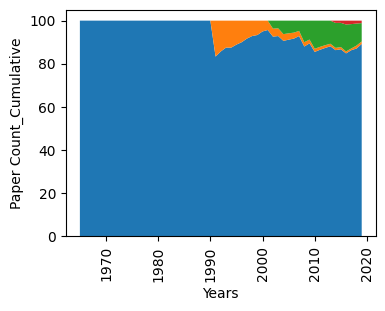

In [77]:
col=None #Colours

plotCumulativeGraph(sizeArr[0],vitalityArr[0],col,False)

1552 1928


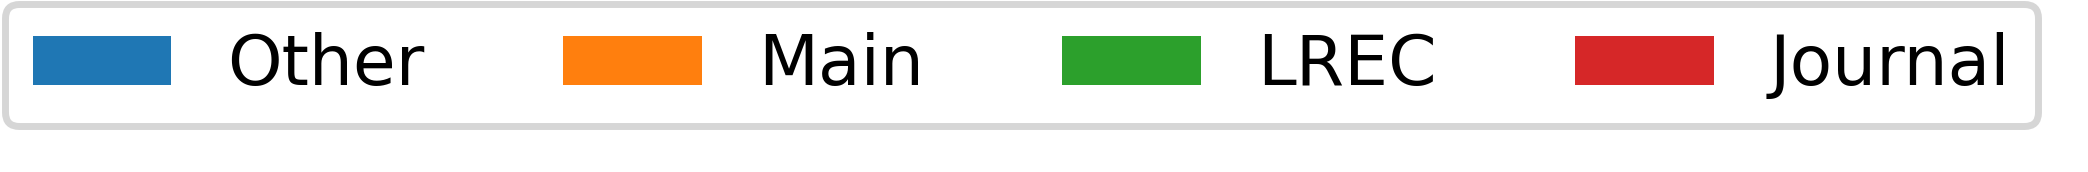

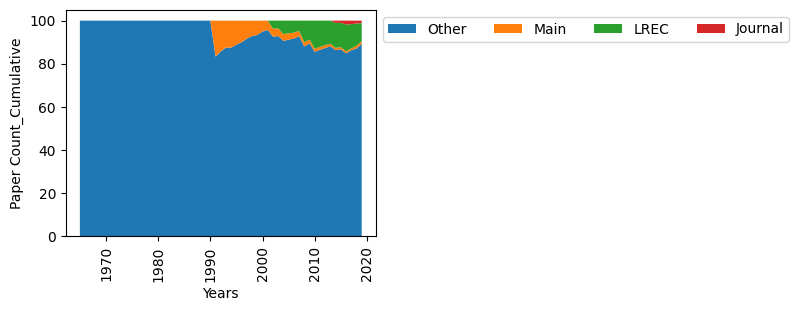

In [80]:
plotCumulativeGraph(sizeArr[0],vitalityArr[0],col,True)
cropAxis("ACL_Small_Extinct_Cumulative","Axis_ACL",80,1300,20)

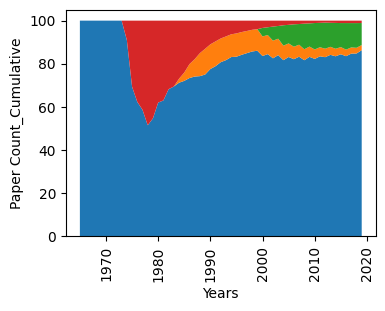

In [81]:
plotCumulativeGraph(sizeArr[0],vitalityArr[1],col,False)

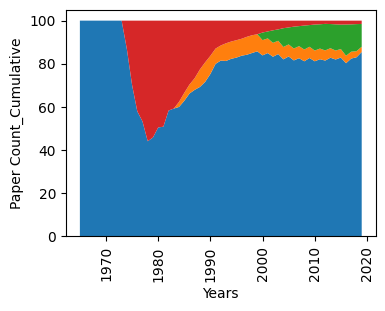

In [82]:
plotCumulativeGraph(sizeArr[0],vitalityArr[2],col,False)

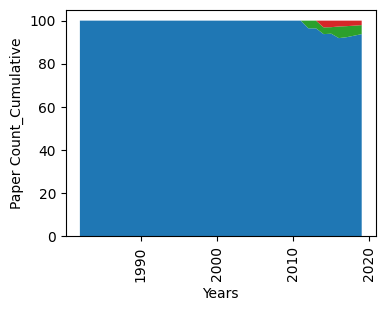

In [83]:
plotCumulativeGraph(sizeArr[0],vitalityArr[3],col,False)

In [84]:
plotCumulativeGraph(sizeArr[1],vitalityArr[0],col,False)

'No need to generate an empty graph'

<Figure size 400x300 with 0 Axes>

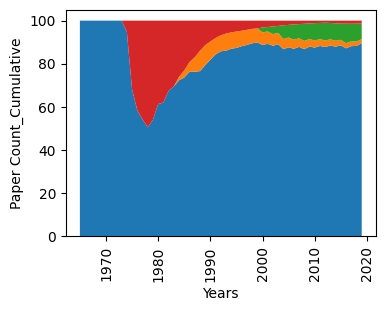

In [85]:
plotCumulativeGraph(sizeArr[1],vitalityArr[1],col,False)

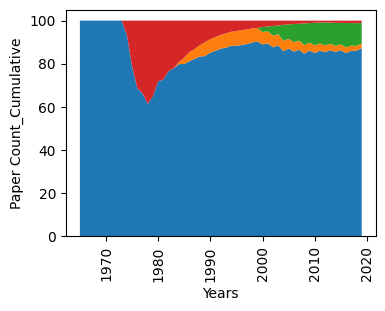

In [86]:
plotCumulativeGraph(sizeArr[1],vitalityArr[2],col,False)

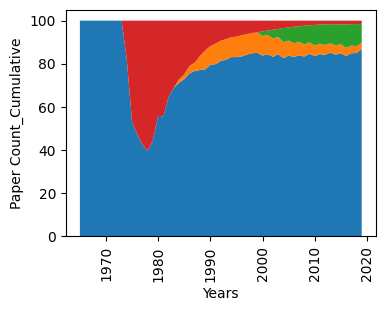

In [87]:
plotCumulativeGraph(sizeArr[1],vitalityArr[3],col,False)

In [88]:
plotCumulativeGraph(sizeArr[2],vitalityArr[0],col,False)

'No need to generate an empty graph'

<Figure size 400x300 with 0 Axes>

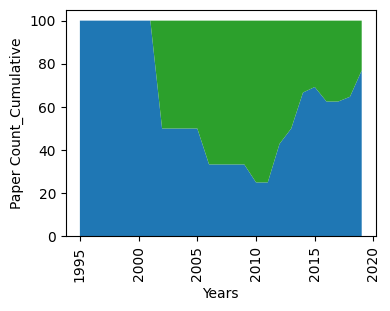

In [89]:
plotCumulativeGraph(sizeArr[2],vitalityArr[1],col,False)

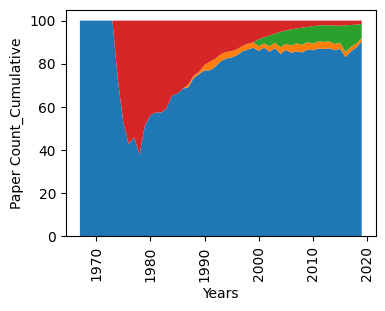

In [90]:
plotCumulativeGraph(sizeArr[2],vitalityArr[2],col,False)

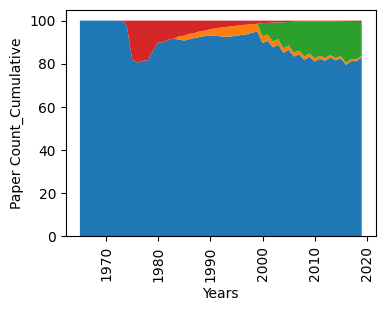

In [91]:
plotCumulativeGraph(sizeArr[2],vitalityArr[3],col,False)

# Reconstructing Joshi et al. (2020) language classes

* Figure 5: Reconstructing Joshi et al. (2020) language classes with Wikipedia article count as the unannotated source and two configurations of annotated sources.
* Table 8: Confusion Matrix of Joshi et al. (2020) classes and Ethnologue language classes considering only LDC and ELRA as the annotated sources, where Ex=Extinct, En=Endangered, St=Stable, and In=Institutional.
* Table 9: Confusion Matrix of Joshi et al. (2020) classes and Ethnologue language classes considering Huggingface, LDC, and ELRA as the annotated sources, where Ex=Extinct, En=Endangered, St=Stable,and In=Institutional.


In [92]:
# Setup initial Joshi regions 

joshiMap={-1:'white',0:'green',1:'blue',2:'purple',3:'orange',4:'red'}
oldJoshiMap={-1:'white',0:'green',1:'blue',2:'purple',3:'yellow',4:'orange',5:'red'}

def getClass(x,y,c): 
  if float(c)<=0:
    return -1 # 'white'

  if x<=2:
    return 0 #'green'
  elif x>=5.9 and y>2.0:
    return 4 #'red'
  elif x>=5 and y>=1.5:
    return 3 #'orange'
  elif x>=4.2 and y>=1.0:
    return 2 #'purple'
  else:
    return 1 #'blue'

In [93]:
# Create a new data frame with the derived class columns

classes12=[]
for s in sizeArr:
  for v in vitalityArr:
    classes12.append(s+"-"+v)

supervised=''
unsupervised=''


def buildFrame(supevisedColumns,supMulti,unsupervisedCoulmns,unsupMulti):
  global supervised
  global unsupervised

  df=data.fillna(0) #get rid of NaNs 
    
  df[unsupervisedCoulmns[0]]=[float(b.replace(",","").replace("-","0")) if type(b)==str else b for b in df[unsupervisedCoulmns[0]].tolist()]  #Drop commas of wikipedia

  #Now  convert Strings to numbers
  for col in supevisedColumns+unsupervisedCoulmns:
    #df[col]=[s.replace(' ',"0") if type(s)==str else s for s in df[col]]
    df[col]=pd.to_numeric(df[col],errors='coerce')
    #print(set(df[col]))
    

  #Now the strings have become NaNs. They too have to be removed
  df=df.fillna(0) #get rid of NaNs

  for col,mult in zip(supevisedColumns+unsupervisedCoulmns,supMulti+unsupMulti): 
    df[col]=mult*df[col]

  supervised='supevised'
  unsupervised=unsupervisedCoulmns[0]

  # Get the average of 'supevisedColumns' to a new column
  df[supervised] = df[supevisedColumns].sum(axis=1)

  #Take log
  for col in [supervised,unsupervised]: #supevisedColumns+unsupervisedCoulmns:
    df[col]=[math.log(b,10)+1 if b>0 else 0 for b in  df[col]]

  #Create class labels
  df['Label']=df['ethnolog_Size']+"-"+df['ethnolog_Vitality']

  df["12class"]=[classes12.index(l) for l in df["Label"]]

  df['NewJoshiClass']=[getClass(x,y,1) for x,y in zip(df[unsupervised].tolist(),df[supervised].tolist())]

  return(df)

In [94]:
def printLatexTable(df): 
  printdf = pd.DataFrame([])

  tableRows='Joshi Classes Smooth'  # 'NewJoshiClass'
  sumN=0
  for i in range(len(classes12)):  
    printdf[classes12[i]]=[len(df[(df['12class'] == i) & (df[tableRows]==j)]) for j in range(len(set(df[tableRows])))]
    sumN=sumN+printdf[classes12[i]].sum()

  #now create the sum row and sum column
  printdf['Sum'] = printdf.sum(axis=1) #Rows
  printdf.loc['Total']= printdf.sum()  #Colums

  lines=printdf.to_latex()
  
  lines=lines.replace(".0 &"," &")
  lines=lines.split("\midrule")[1]
  lines=lines.split("\\bottomrule")[0]
  while "&  " in lines:
    lines=lines.replace("&  ","& ")
  while "  &" in lines:
    lines=lines.replace("  &"," &")
  lines=lines.replace("Total","\hline\nTotal")
  return(lines,sumN)

In [105]:
from matplotlib import pyplot

huggingSuffix="" #This will be set later
classAreas={} # This too will be set later

def drawWithClass(df,cln,areaM,oldJoshi,withLegend,huggingSuffix):
  global classAreas
  fig, ax = plt.subplots(figsize=(2, 1), dpi=100)

  if oldJoshi:
    JoshiClasses=[ oldJoshiMap[j] for j in df['Joshi Classes Smooth']]
  else:
    if len(cln)>0:
      JoshiClasses=[joshiMap[getClass(x,y,c)] for x,y,c in zip(df[unsupervised].tolist(),df[supervised].tolist(),df[cln].tolist())]
    else:
      JoshiClasses=[joshiMap[getClass(x,y,1)] for x,y in zip(df[unsupervised].tolist(),df[supervised].tolist())]

  if(areaM):
    colN=1
  else:
    colN=len(jcolourNames) 

  scatter = ax.scatter(df[unsupervised].tolist(), df[supervised].tolist() ,c=df["Joshi Classes Smooth"].tolist() ,s=20, alpha=0.5,cmap=jcmp, edgecolor='black')  #c=JoshiClasses  s=1, c=colors,  c=df["12class"].tolist()  ,marker="^",s=50   # c=NewJoshiClasses

  if(withLegend):
    legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes", bbox_to_anchor=(1, 1), ncol=colN)
    ax.add_artist(legend1)

  
  if(areaM):
    for i in classAreas:
      print("Shading: "+str(i))
      ax.fill(classAreas[i][0], classAreas[i][1], alpha=0.3, c=jcolourNames[i])

  ax.grid()
  plt.xlabel("Unlabeled data (log)")
  plt.ylabel("Labeled data (log)")

  xLim=8
  yLim=4
  plt.xticks(range(xLim+1),['']+['$10^'+str(i)+'$' for i in range(xLim)])
  plt.yticks(range(yLim+1),['']+['$10^'+str(i)+'$' for i in range(yLim)])

  plt.xlim([0, xLim+0.5])
  plt.ylim([0, yLim+0.5])

  if len(cln)>0:
    fileName='classes_'+cln+'_'+huggingSuffix
  else:
    fileName='classes_'+huggingSuffix

  if areaM:
    fileName=fileName+'_AreaMarked.png'
  elif withLegend: #This is the legend only option 
    fileName=pathI+"Axis_Joshi.png"
  else:
    fileName=fileName+'.png'
  
  fig.set_size_inches(8, 4)
  fileName=makeFileNameArxivSafe(fileName)
  fileName=pathI+fileName
  print(fileName)
  plt.savefig(fileName,bbox_inches='tight', dpi=500)

In [98]:
# Preprare the Data frame df

from sklearn.neighbors import KNeighborsClassifier

knnX=['Size of Wikipedia (Articles Column)','supevised']
knnY='Joshi Classes'

def initiateKnn(df):
  knn = KNeighborsClassifier(n_neighbors=5) # Create the knn model. # Look at the five closest neighbors.  

  df[knnY]=[int(j) for j in df[knnY].tolist()]

  knnTrain=df[df[knnY]!=-1]

  knn.fit(knnTrain[knnX], knnTrain[[knnY]]) # Fit the model on the training data.

  predictions= knn.predict(df[knnX]) # Make point predictions on the test set using the fit mod

  df[knnY]=[ p  if j<0 else j  for j,p in zip(df[knnY].tolist(),predictions)] #Now update
  return(df)

In [100]:
# Now let's create the smoothed column

knnYnew='Joshi Classes Smooth'

def smoothen(df,inCol,outCol,precedence,k):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(df[knnX], df[[inCol]]) # Fit the model on the training data.

  if(precedence):
    predictions= knn.predict(df[knnX]) # Make point predictions on the test set using the fit mod
    df[outCol]=[ n if n>o else o for o,n in zip(df[outCol].tolist(),predictions)]
  else:
    df[outCol]= knn.predict(df[knnX]) # Make point predictions on the test set using the fit mod
  return(df)

In [101]:
# Construct the convex hulls and assign points

from scipy.spatial import ConvexHull
from scipy import interpolate

xCol='Size of Wikipedia (Articles Column)'
yCol='supevised'

def in_hull(p, Xlist,yList):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    hull=[ [x,y]  for x,y in zip(Xlist,yList)]
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0

def generateClassRegions(df,inte):
  global classAreas
  joshiClassList=list(set(df[knnYnew]))
  joshiClassList.sort()
  #print(joshiClassList)
  for i in joshiClassList:
    points=df[df[knnYnew]==i][[xCol,yCol]].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],points[hull.vertices,1][0])

    if(inte):
      dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
      dist_along = np.concatenate(([0], dist.cumsum()))
      spline, u = interpolate.splprep([x_hull, y_hull],u=dist_along, s=0)
      interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
      interp_x, interp_y = interpolate.splev(interp_d, spline)
      classAreas[i]=[interp_x, interp_y] #[x_hull,y_hull]
    else:
      classAreas[i]=[x_hull,y_hull]
  #return df

def reassignpoints(df,withPrecedence):
  global classAreas
  joshiClassList=list(set(df[knnYnew]))
  joshiClassList.sort()
  joshiClassList.reverse()
  reassignedCount=0
  for i in joshiClassList:
    if(withPrecedence):
      points=df[df[knnYnew]<i][[xCol,yCol]].values #Only smaller classes get overwhelmed by the bigger ones
    else:
      points=df[df[knnYnew]!=i][[xCol,yCol]].values # All vilating points corrected, higher and lower (Warning: This should only happen after all other corrections are done.)    
    for p in points:
      if(in_hull(p, classAreas[i][0],classAreas[i][1])):
        #print(p)
        row=df.index[(df[xCol]==p[0]) & (df[yCol]==p[1])].tolist()[0]
        df.loc[row,knnYnew] = i
        reassignedCount=reassignedCount+1
  return(df,reassignedCount)

# This resores the class 0 and 1 boarders that are axis parallel 
def restoreAxisPrallelJoshiBoarders(df):
  # Everthing left to 10^1 line should be class 0
  rows=df.index[(df[xCol]<2.1)&(df[knnYnew]>0)].tolist()
  for r in rows:
    df.loc[r,knnYnew] = 0

  # Class 1 should not go above 10^1
  rows=df.index[(df[yCol]>1.0)&(df[knnYnew]==1)].tolist()
  for r in rows:
    df.loc[r,knnYnew] = 2
  
  return(df)

In [102]:
def drawWithSmoothen(withHuggingFace,area,withLegend,epochCount,useNewestHugginFace):
  if(withHuggingFace):
    huggingSuffix="with_HuggingFace"
    hugginfceCol='Hugginface'
    if(useNewestHugginFace):
      hugginfceCol='HF new'
    df=buildFrame(['LDC',	'ELRA',hugginfceCol],[LDCmulti,ELRAmulti,1],['Size of Wikipedia (Articles Column)'],[wikiMulti])  #With Huggingface   
  else:
    huggingSuffix="without_HuggingFace"
    df=buildFrame(['LDC',	'ELRA'],[LDCmulti,ELRAmulti],['Size of Wikipedia (Articles Column)'],[wikiMulti])  #Without Huggingface
  df=initiateKnn(df)

  df=smoothen(df,knnY,knnYnew,False,5) #first iteration is fron actual to new
  
  reassignedCount=epochCount
  #for i in range(epochCount):
  while reassignedCount>0:    
    df=smoothen(df,knnYnew,knnYnew,True,107) #Subsequent iterations are fron new to new  #57
    if(not withHuggingFace):
      generateClassRegions(df,False) #Generate for original assignment without curves
    df,reassignedCount=reassignpoints(df,True) # Now reassign
    generateClassRegions(df,False) #re-Generate for new assignment without curves

  #Re store class 0 and 1 Joshi boarders
  df=restoreAxisPrallelJoshiBoarders(df)
  generateClassRegions(df,False) #re-Generate for new assignment without curves

  df,reassignedCount=reassignpoints(df,False) # Now reassign one last time without precedence
  generateClassRegions(df,False) #Generate for final assignment without curves 
  print("*********************************************")
  drawWithClass(df,'',area,True,withLegend,huggingSuffix)  
  return(df)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

*********************************************
Shading: 0
Shading: 1
Shading: 2
Shading: 3
Shading: 4
Shading: 5
/content/gdrive/MyDrive/Research/AACL Sinhala Paper/Final Official Github Repo/Data/Output/images/classes_without_HuggingFace_AreaMarked.png
6420

0 & 331 & 2146 & 1165 & 27 & 0 & 430 & 1676 & 165 & 0 & 11 & 109 & 75 & 6135 \\
1 & 1 & 15 & 3 & 1 & 0 & 28 & 24 & 40 & 0 & 2 & 22 & 73 & 209 \\
2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 0 & 1 & 0 & 19 & 22 \\
3 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 26 & 29 \\
4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 17 & 18 \\
5 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 7 & 7 \\
\hline
Total & 332 & 2162 & 1168 & 28 & 0 & 458 & 1700 & 208 & 0 & 14 & 133 & 217 & 6420 \\



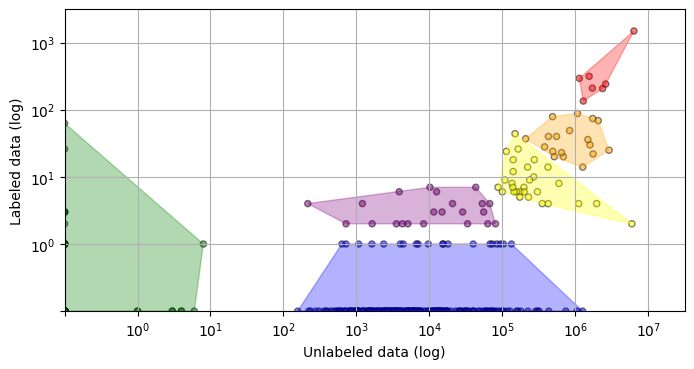

In [106]:
# Draw without huggingface and area marked

df=drawWithSmoothen(False,True,False,1,False)
lines,allLangCount=printLatexTable(df)

print(allLangCount)
print(lines)

f=open(pathT+"withoutHugging.tex",'w')
f.write(lines)
f.close()

In [107]:
# View the languages in the top class

df[df[knnYnew]==5]

,Name,ethnolog_Size,ethnolog_Vitality,L1 speakers,L2 speakers,New wiki,Size of Wikipedia (Articles Column),language family,geographical location,geo location analysis,...,Is in Facebook,Joshi Classes,mBERT,HF new,XLMR+mBERT,supevised,Label,12class,NewJoshiClass,Joshi Classes Smooth
279,Arabic,Large,Institutional,350 million,270 million,1174540.0,7.056796,Afro-Asiatic,0,Central Asia,...,1,5,1.0,83.0,29.0,3.468347,Large-Institutional,11,4,5
1076,Chinese,Large,Institutional,1.2 billion,0,1458327.0,7.192012,Sino-Tibetan,"China, Singapore, Taiwan\nCantonese, Hong K...",Eastern Asia,...,1,5,1.0,72.0,1.0,3.498311,Large-Institutional,11,4,5
1486,English,Large,Institutional,360–400 million,750 million,6538164.0,7.805702,Indo-European,"Europe, North America, Australia",Western Europe,...,1,5,1.0,625.0,301.8,4.173478,Large-Institutional,11,4,5
1582,French,Large,Institutional,76.8 million,197 million,2437710.0,7.375905,Indo-European,France,Western Europe,...,1,5,1.0,101.0,57.8,3.315970,Large-Institutional,11,4,5
1698,German,Large,Institutional,90–95 million,10–25 million,2705964.0,7.418692,Indo-European,German,Western Europe,...,1,5,1.0,102.0,67.6,3.383815,Large-Institutional,11,4,5
2193,Japanese,Large,Institutional,~128 million,0,1333645.0,7.112118,Japonic,"Japan (de facto), Palau",Eastern Asia,...,1,5,1.0,53.0,70.3,3.130334,Large-Institutional,11,4,5
5267,Spanish,Large,Institutional,489 million,75 million,1788654.0,7.236042,Indo-European,"Spain, Equatorial Guinea, Western Sahara, Hisp...",Southern Europe,...,1,5,1.0,99.0,54.3,3.322219,Large-Institutional,11,4,5


In [108]:
withoutHuggin="Without Huggingface Joshi"
joshiBackup=[j  for j in df[knnYnew].tolist()] #Take a manual back up for later taking diff.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

*********************************************
Shading: 0
Shading: 1
Shading: 2
Shading: 3
Shading: 4
Shading: 5
/content/gdrive/MyDrive/Research/AACL Sinhala Paper/Final Official Github Repo/Data/Output/images/classes_with_HuggingFace_AreaMarked.png
6420

0 & 331 & 2146 & 1165 & 27 & 0 & 430 & 1676 & 165 & 0 & 11 & 109 & 75 & 6135 \\
1 & 1 & 12 & 3 & 1 & 0 & 19 & 23 & 24 & 0 & 2 & 18 & 27 & 130 \\
2 & 0 & 3 & 0 & 0 & 0 & 9 & 1 & 17 & 0 & 1 & 4 & 61 & 96 \\
3 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 2 & 26 & 30 \\
4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 21 & 22 \\
5 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 7 & 7 \\
\hline
Total & 332 & 2162 & 1168 & 28 & 0 & 458 & 1700 & 208 & 0 & 14 & 133 & 217 & 6420 \\



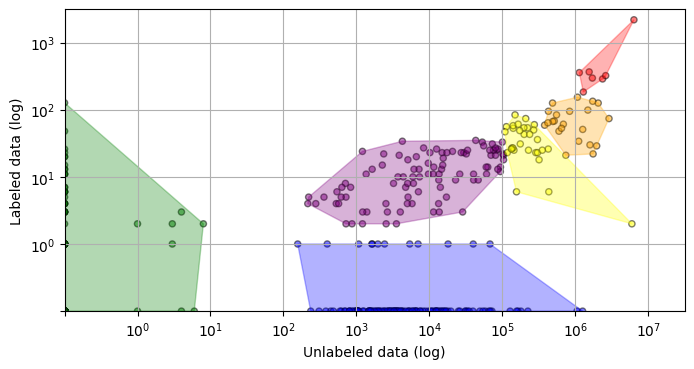

In [109]:
df=drawWithSmoothen(True,True,False,10,False)
lines,allLangCount=printLatexTable(df)

print(allLangCount)
print(lines)

f=open(pathT+"withHugging.tex",'w')
f.write(lines)
f.close()

In [110]:
# View the languages in the top class

df[df[knnYnew]==5]

,Name,ethnolog_Size,ethnolog_Vitality,L1 speakers,L2 speakers,New wiki,Size of Wikipedia (Articles Column),language family,geographical location,geo location analysis,...,Is in Facebook,Joshi Classes,mBERT,HF new,XLMR+mBERT,supevised,Label,12class,NewJoshiClass,Joshi Classes Smooth
279,Arabic,Large,Institutional,350 million,270 million,1174540.0,7.056796,Afro-Asiatic,0,Central Asia,...,1,5,1.0,83.0,29.0,3.553883,Large-Institutional,11,4,5
1076,Chinese,Large,Institutional,1.2 billion,0,1458327.0,7.192012,Sino-Tibetan,"China, Singapore, Taiwan\nCantonese, Hong K...",Eastern Asia,...,1,5,1.0,72.0,1.0,3.564666,Large-Institutional,11,4,5
1486,English,Large,Institutional,360–400 million,750 million,6538164.0,7.805702,Indo-European,"Europe, North America, Australia",Western Europe,...,1,5,1.0,625.0,301.8,4.340841,Large-Institutional,11,4,5
1582,French,Large,Institutional,76.8 million,197 million,2437710.0,7.375905,Indo-European,France,Western Europe,...,1,5,1.0,101.0,57.8,3.459392,Large-Institutional,11,4,5
1698,German,Large,Institutional,90–95 million,10–25 million,2705964.0,7.418692,Indo-European,German,Western Europe,...,1,5,1.0,102.0,67.6,3.509203,Large-Institutional,11,4,5
2193,Japanese,Large,Institutional,~128 million,0,1333645.0,7.112118,Japonic,"Japan (de facto), Palau",Eastern Asia,...,1,5,1.0,53.0,70.3,3.264818,Large-Institutional,11,4,5
5267,Spanish,Large,Institutional,489 million,75 million,1788654.0,7.236042,Indo-European,"Spain, Equatorial Guinea, Western Sahara, Hisp...",Southern Europe,...,1,5,1.0,99.0,54.3,3.472756,Large-Institutional,11,4,5


In [111]:
df[withoutHuggin]=joshiBackup # Re-assign the saved backup

In [112]:
# Finding the languages that shifted class

langDiff=df[(df[withoutHuggin]>df[knnYnew]) | (df[withoutHuggin]<df[knnYnew])][["Name","Label",withoutHuggin,knnYnew]].rename(columns = {knnYnew : "With Huggingface", withoutHuggin:"Without Huggingface"})
langDiff.to_csv(pathC+'langDiff.csv')

## The following are code snippets to draw the above with respecct to a given class. These were **not** used in the paper

In [113]:
drawBase=False
drawFacebook=False
drawGoogle=False
drawXLMR=False

In [114]:
if(drawBase):
  drawWithClass('',False,False,False)

In [115]:
if(drawFacebook):
  drawWithClass('Is in Facebook',False,False,False)

In [116]:
if(drawGoogle):
  drawWithClass('Is in Google',False,False,False)

In [117]:
if(drawXLMR):
  drawWithClass('XLMR+mBERT',False,False,False)

# Generating Contribution and Coverage tables
* Table 1: The Coverage of the 10 existing Ethnologue language classes in the listed resources. Under each resource, the Count column shows the number of languages in the relevant class included in the resource and the % column
shows that number as a percentage of the total number of languages in the class.
* Table 2: Contribution and Coverage of the 10 existing Ethnologue language classes and Joshi et al. (2020) classes in the listed resources where X+mB refers to the union of XLMR and mBERT. If for Class Ci of total ni members
and a resource Rj of total mj members, the number of members in Ci present in Rj is given by ui,j then, the contribution is 100(ui,j /mj ) and the coverage is 100(ui,j /nj )
* Table 4: The Coverage of the 12 Ethnologue language classes in the CommonCrawl. The Count column shows the number of languages in the relevant
class covered by the CommonCrawl and the % column shows that number as a percentage of the total number of languages in the class.

In [118]:
percentageColumns=['Is in Facebook','Is in Google','XLMR+mBERT']

def countInColumn(tempFrame,column):
  col=tempFrame[column].fillna(0).tolist()
  #print(set(col))
  col=[float(c) for c in col]
  col=[1 if c>0 else 0 for c in col]
  return(round(sum(col),2))


columnTotals={c:countInColumn(data,c) for c in percentageColumns}


def applyToSlice(dfSlice,classN):
  global boxedCoverage
  global boxedContribution

  boxedCoverage[classN]={}
  boxedContribution[classN]={}
  
  langcount=len(dfSlice)
 
  for c in percentageColumns:
    colCount=countInColumn(dfSlice,c)
    if(langcount>0):
      boxedCoverage[classN][c+'_cov']=round((100*colCount)/langcount,2)
    else:
      boxedCoverage[classN][c+'_cov']='N/A'
    boxedContribution[classN][c]=round((100*colCount)/columnTotals[c],2)

  boxedCoverage[classN]["Language Count"]=str(langcount)

In [119]:
boxedCoverage={}
boxedContribution={}

jclassesInTable=knnYnew  #'NewJoshiClass'


# Calculate Ethnalogue
for s in sizeArr:
  for v in vitalityArr:
    classN=s+"-"+v
    applyToSlice(d[s][v],classN)

# Calculate Joshi
for j in range(len(set(df[jclassesInTable]))):
  joshiSlice=df[df[jclassesInTable]==j]
  applyToSlice(joshiSlice,str(j))

boxedContribution["Total"]=columnTotals

boxedCoverage = pd.DataFrame(boxedCoverage).T
boxedContribution = pd.DataFrame(boxedContribution).T

In [120]:
# Calculate the sums 

summableColumns=['LDC','ELRA','Hugginface','Size of Wikipedia (Articles Column)','CC Size','Is in Facebook','Is in Google','XLMR+mBERT','ACL count']

boxed={}
totalFrame = pd.DataFrame()

for s in sizeArr:
  boxed[s]={}
  for v in vitalityArr:
    boxed[s][v]=d[s][v]
    boxed[s][v]=boxed[s][v][boxed[s][v] != 0]  #Drop zero  
    boxed[s][v]=boxed[s][v].drop(['Name', 'ethnolog_Size', 'ethnolog_Vitality','universal dependencies'], axis=1)
    for c in summableColumns:      
      boxed[s][v][c]=boxed[s][v][c].fillna(0) #get rid of NaNs      
      boxed[s][v][c]=[float(b.replace(",","").replace("-","0").replace(" ","0")) if type(b)==str else b for b in boxed[s][v][c].tolist()]      
      boxed[s][v][c]=[1 if c!=0 else 0 for c in boxed[s][v][c].tolist()]
      boxed[s][v][c]=boxed[s][v][c].sum()
    boxed[s][v]=boxed[s][v].dropna(subset=summableColumns)
    boxed[s][v]['Class']=s+"-"+v  
    boxed[s][v]['Count']=len(d[s][v]['Name'])  
    for c in summableColumns:      
      boxed[s][v][c+' Scaled']=round((100*boxed[s][v][c])/boxed[s][v]['Count'],2)    
    boxed[s][v]=boxed[s][v].head(1)
    totalFrame=totalFrame.append(boxed[s][v])

def format12ClassNames(s):
  return s.replace("-"," ").title().replace(" ","-")

def getTable(cols,roun):
  global totalFrame
  allCols=makeCols(cols)
  sel=totalFrame[allCols]
  for c,r in zip(cols,roun):    
    s=c+' Scaled'
    sel[s]=round(sel[s],r)
  lines=sel.to_latex(index=False)
  lines=lines.replace(".0 &"," &")
  lines=lines.split("\midrule")[1]
  lines=lines.split("\\bottomrule")[0]
  while "&  " in lines:
    lines=lines.replace("&  ","& ")
  while "  &" in lines:
    lines=lines.replace("  &"," &")
  return(lines)

def makeCols(cols):
  newCols=['Class']
  for c in cols:
    newCols=newCols+[c,c+' Scaled']
  return newCols

In [121]:
lines=getTable(['LDC','ELRA','Hugginface','Size of Wikipedia (Articles Column)','ACL count'],[3,3,3,3,3])  # '   

print(lines)

f=open(pathT+"Conv.tex",'w')
f.write(lines)
f.close()


      Small-Extinct & 1 & 0.30 & 1 & 0.30 & 0 & 0.00 & 1 & 0.30 & 12 & 3.61 \\
   Small-Endangered & 4 & 0.19 & 2 & 0.09 & 13 & 0.60 & 18 & 0.83 & 188 & 8.70 \\
       Small-Stable & 0 & 0.00 & 0 & 0.00 & 1 & 0.09 & 3 & 0.26 & 105 & 8.99 \\
Small-Institutional & 0 & 0.00 & 0 & 0.00 & 1 & 3.57 & 1 & 3.57 & 5 & 17.86 \\
     Mid-Endangered & 1 & 0.22 & 2 & 0.44 & 11 & 2.40 & 28 & 6.11 & 55 & 12.01 \\
         Mid-Stable & 7 & 0.41 & 3 & 0.18 & 4 & 0.24 & 25 & 1.47 & 193 & 11.35 \\
  Mid-Institutional & 4 & 1.92 & 5 & 2.40 & 26 & 12.50 & 45 & 21.63 & 42 & 20.19 \\
   Large-Endangered & 0 & 0.00 & 2 & 14.29 & 3 & 21.43 & 3 & 21.43 & 1 & 7.14 \\
       Large-Stable & 4 & 3.01 & 3 & 2.26 & 9 & 6.77 & 24 & 18.05 & 29 & 21.80 \\
Large-Institutional & 69 & 31.80 & 64 & 29.49 & 121 & 55.76 & 145 & 66.82 & 134 & 61.75 \\



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [122]:
lines=getTable(['CC Size'],[5])  

print(lines)

f=open(pathT+"CC.tex",'w')
f.write(lines)
f.close()


      Small-Extinct & 0 & 0.00 \\
   Small-Endangered & 4 & 0.19 \\
       Small-Stable & 0 & 0.00 \\
Small-Institutional & 1 & 3.57 \\
     Mid-Endangered & 4 & 0.87 \\
         Mid-Stable & 2 & 0.12 \\
  Mid-Institutional & 19 & 9.13 \\
   Large-Endangered & 1 & 7.14 \\
       Large-Stable & 4 & 3.01 \\
Large-Institutional & 100 & 46.08 \\



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [123]:
# Create the merged table 

lines=boxedContribution.join(boxedCoverage).to_latex()
lines=lines.replace("\n","\n& ")
lines=lines.replace("& Small-Extinct","\\parbox[t]{2mm}{\\multirow{12}{*}{\\rotatebox[origin=c]{90}{\\tiny Ethnologue}}} & Small-Extinct")
lines=lines.replace("& 0","\hline\n\\parbox[t]{2mm}{\\multirow{5}{*}{\\rotatebox[origin=c]{90}{\\tiny\\citet{joshi2020state}}}} & 0")
lines=lines.replace("& Total","\hline\n\hline\n\\multicolumn{2}{|c|}{Total}")
lines=lines.replace("NaN","")
lines=lines.split("& \midrule")[1]
lines=lines.split("& \\bottomrule")[0]
while "&  " in lines:
  lines=lines.replace("&  ","& ")
while "  &" in lines:
  lines=lines.replace("  &"," &")
lines=lines.split("Total")
lines[1]=lines[1].replace(".00","")
lines[1]=lines[1].replace("& \\","& "+str(allLangCount)+" \\")
lines="Total".join(lines)
print(lines)

f=open(pathT+"ConVsCov.tex",'w')
f.write(lines)
f.close()

f=open(pathT+"LangsCount.tex",'w')
f.write(str(allLangCount))
f.close()


\parbox[t]{2mm}{\multirow{12}{*}{\rotatebox[origin=c]{90}{\tiny Ethnologue}}} & Small-Extinct & 0.00 & 0.00 & 0.00 & 0.0 & 0.0 & 0.0 & 332 \\
& Small-Endangered & 4.96 & 0.95 & 0.88 & 0.32 & 0.05 & 0.05 & 2162 \\
& Small-Stable & 0.00 & 0.00 & 0.00 & 0.0 & 0.0 & 0.0 & 1168 \\
& Small-Institutional & 0.00 & 0.95 & 0.00 & 0.0 & 3.57 & 0.0 & 28 \\
& Mid-Extinct & 0.00 & 0.00 & 0.00 & N/A & N/A & N/A & 0 \\
& Mid-Endangered & 5.67 & 1.90 & 4.39 & 1.75 & 0.44 & 1.09 & 458 \\
& Mid-Stable & 3.55 & 0.00 & 1.75 & 0.29 & 0.0 & 0.12 & 1700 \\
& Mid-Institutional & 7.80 & 8.57 & 7.89 & 5.29 & 4.33 & 4.33 & 208 \\
& Large-Extinct & 0.00 & 0.00 & 0.00 & N/A & N/A & N/A & 0 \\
& Large-Endangered & 1.42 & 0.95 & 0.88 & 14.29 & 7.14 & 7.14 & 14 \\
& Large-Stable & 4.26 & 1.90 & 7.02 & 4.51 & 1.5 & 6.02 & 133 \\
& Large-Institutional & 72.34 & 84.76 & 77.19 & 47.0 & 41.01 & 40.55 & 217 \\
\hline
\parbox[t]{2mm}{\multirow{5}{*}{\rotatebox[origin=c]{90}{\tiny\citet{joshi2020state}}}} & 0 & 7.80 & 0.95 &